In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# Pretty display for notebooks
%matplotlib inline

In [2]:
data = pd.read_csv("..\Datasets\water\water_potability.csv")

In [3]:
display(data.head(n=10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
data = data.fillna(data.mean())
#data = data.dropna()
display(data.head(n=10))
print(data.isna().sum().sum())
print(data.isnull().sum())
print(data.shape)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
(3276, 10)


In [5]:
print(data.describe())
print(data["Potability"].unique())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


In [6]:
output = data[['Potability']]
features = data.drop(columns='Potability')


In [7]:
# Import train_test_split
# Split into training, validation and testing.
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, output, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2620 samples.
Testing set has 656 samples.


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2096 samples.
Validation set has 524 samples.
Testing set has 656 samples.


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # default=(0, 1)
# Do scaling on training. Apply the same transformation to validation and testing.
X_train_np = scaler.fit_transform(X_train)
X_train_std = pd.DataFrame(data=X_train_np,columns=X_train.columns)
X_val_np = scaler.transform(X_val)
X_val_std = pd.DataFrame(data=X_val_np,columns=X_train.columns)
X_test_np = scaler.transform(X_test)
X_test_std = pd.DataFrame(data=X_test_np,columns=X_train.columns)


In [10]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,30)
tim = {}
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    start = time()
    km = km.fit(X_train_std)
    end = time()
    tim[k] = end -start
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[17325.808292750462, 16190.118303076428, 15408.264754345604, 14730.995586953133, 14194.952793326376, 13733.653497565585, 13344.248413460815, 12934.259637887664, 12615.633617975749, 12364.930567425889, 12123.427387569387, 11902.372616346014, 11694.932263251747, 11508.978933547802, 11329.280878969086, 11136.191250562008, 10975.099836121904, 10854.514582294858, 10734.149900328062, 10496.480027956077, 10437.603353037295, 10372.515001620866, 10266.850718985208, 10163.673856210407, 10029.519455422373, 9974.592547478785, 9845.349975853014, 9747.53826448545]


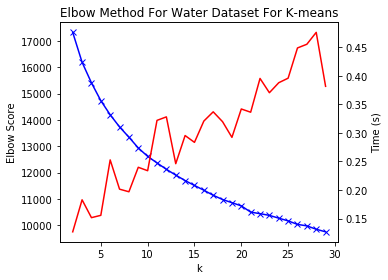

In [11]:
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (5.5,4))
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Elbow Score')
ax1.set_title('Elbow Method For Water Dataset For K-means')
ax2 = ax1.twinx()
ax2.plot(K,tim.values(),'red')
ax2.set_ylabel('Time (s)')

#ax1 = visualizer.show() 


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [12]:
#pip install yellowbrick

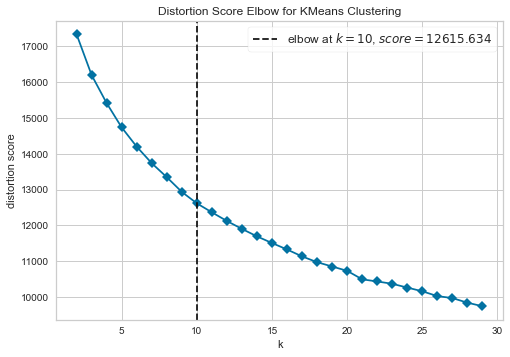

In [13]:
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,30), timings= False)
visualizer.fit(X_train_std) 
visualizer.show()



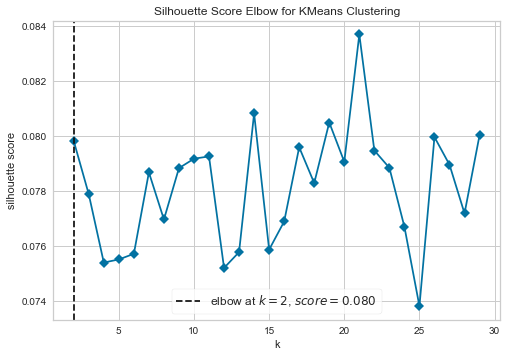

In [14]:
model = KMeans(random_state=1)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= False)
visualizer.fit(X_train_std)        # Fit the data to the visualizer

visualizer.show() 

In [15]:
from sklearn.metrics import silhouette_score
score_list = []
K = range(2,30)
timGM = {}
for k in K:
    GM = GaussianMixture(n_components=k,random_state=1)
    start = time()
    GM = GM.fit(X_train_std)
    end = time()
    timGM[k] = end - start
    pred = GM.predict(X_train_std)
    score = silhouette_score(X_train_std, pred)
    score_list.append(score)
print(score_list)

[0.08399034948811691, -0.019425119035929497, -0.021426851590639336, -0.019599522689114898, -0.04056557748526197, -0.025326321404871184, -0.04054090661113663, -0.02388448281696212, -0.034542327056765944, -0.04865719426293819, -0.048096413352901, -0.04925379679538041, -0.04071107205047386, -0.04982507201172831, -0.05056987962783622, -0.04817783613117592, -0.046652196795665214, -0.05041740837451773, -0.05250391359610826, -0.05266081464943325, -0.048115226573246433, -0.04708869624643674, -0.0583893951255049, -0.048723217276420254, -0.0635834966956149, -0.05117045898979031, -0.05059081478270678, -0.05674642786632828]


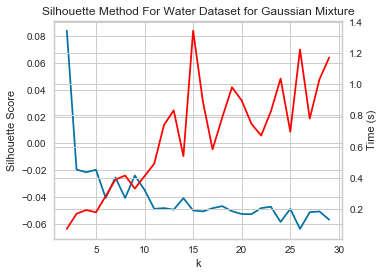

In [16]:
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (5.5,4))
ax1.plot(K, score_list, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Method For Water Dataset for Gaussian Mixture')
ax2 = ax1.twinx()
ax2.plot(K,timGM.values(),'red')
ax2.set_ylabel('Time (s)')

#ax1 = visualizer.show() 


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(X_train_std)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[1.18640619 1.17470567 1.07471076 1.02476892 0.99086524 0.95757957
 0.93222188 0.88293079 0.7801069 ]
[0.13176002 0.13046058 0.11935534 0.11380889 0.11004361 0.10634697
 0.10353079 0.09805662 0.08663719]
[49.85499947 49.60855155 47.45017438 46.33455387 45.56163612 44.78983377
 44.19281442 43.00860394 40.42677275]


# Dimensionality Reduction

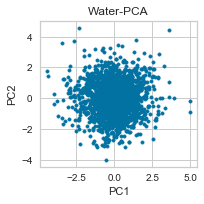

In [18]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_train_std)

fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.scatter(X_transformed[:,0],X_transformed[:,1],marker = '.')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Water-PCA')


pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


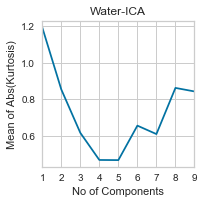

In [19]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
shape = X_train_std.shape[1]
values = []
K = range(1,shape+1)
for i in K:
    ica = FastICA(random_state=1, n_components=i)
    x_transformed = ica.fit_transform(X_train_std)
    kurt = (abs(kurtosis(x_transformed))).mean()
    values.append(kurt)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,values, 'bx-')
ax1.set_xlabel('No of Components')
ax1.set_ylabel('Mean of Abs(Kurtosis)')
ax1.set_xlim(1,5)
ax1.set_xticks(K)
ax1.set_title('Water-ICA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

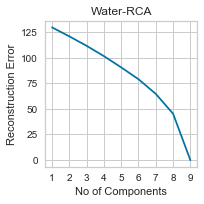

In [20]:
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
size = X_train_std.shape[1]
A=X_train_std
val = []
K = range(1,size+1)
for i in K:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X = RP.fit_transform(X_train_std)
    W = RP.components_

    #numpy pinv
    W_pinv=pinv(W).transpose()
    B = np.dot(X, W_pinv)

    #calc. dist. from original points
    dist = np.linalg.norm(A-B)
    val.append(dist)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,val, 'bx-')
ax1.set_xlabel('No of Components')
ax1.set_ylabel('Reconstruction Error')
#ax1.set_xlim(1,5)
ax1.set_xticks(K)
ax1.set_title('Water-RCA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

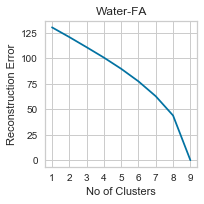

In [21]:
from sklearn.cluster import FeatureAgglomeration
from scipy.linalg import pinv
size = X_train_std.shape[1]
A=X_train_std
val = []
K = range(1,size+1)
for i in K:
    RP = FeatureAgglomeration(n_clusters=i)
    X = RP.fit_transform(X_train_std)
    Xinv = RP.inverse_transform(X)

    #calc. dist. from original points
    dist = np.linalg.norm(A-Xinv)
    val.append(dist)
    
fig, ax1 = pl.subplots(nrows = 1, ncols = 1, figsize = (3,3))
ax1.plot(K ,val, 'bx-')
ax1.set_xlabel('No of Clusters')
ax1.set_ylabel('Reconstruction Error')
#ax1.set_xlim(1,5)
ax1.set_xticks(K)
ax1.set_title('Water-FA')

pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
pl.tight_layout()
pl.show()

## Dimensionality Reduction + Clustering

PCA+Kmeans

In [35]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    pca = PCA(n_components=i,random_state=1)
    X_transformed = pca.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 1058.3176866313881
sil 1 2 0.07283467516081989
elb 1 3 578.9075288235558
elb 1 4 366.1128492353721
elb 1 5 252.78357002727725
elb 1 6 182.35111905728235
elb 1 7 134.32122240514863
elb 1 8 107.52473618318763
elb 1 9 89.0292237492249
elb 1 10 72.76254189897749
elb 1 11 61.02737211802444
elb 1 12 50.9264098256349
elb 1 13 43.80838357952468
elb 1 14 38.51733465283759
elb 1 15 33.38863322294495
elb 1 16 29.666562662959098
elb 1 17 25.817504706348537
elb 1 18 22.71865649321827
elb 1 19 20.142457297652996
elb 1 20 17.964385312730563
elb 1 21 16.279107518750173
elb 1 22 14.855630218620613
elb 1 23 13.788498665520295
elb 1 24 12.607952978264652
elb 1 25 11.344870271072722
elb 1 26 10.45481278361671
elb 1 27 9.611416340961451
elb 1 28 8.848298921979717
elb 1 29 8.03186839842514
sil 2 2 0.07791875752635288
sil 3 2 0.08179009229496663
sil 4 2 0.08248696908753024
sil 9 21 0.08368695331606403


PCA+GM

In [36]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    pca = PCA(n_components=i,random_state=1)
    X_transformed = pca.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        GM = GM.fit(X_transformed)
        pred = GM.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.08668739495290817
sil 2 2 0.10672086403148208


ICA+Kmeans

In [29]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    ica = FastICA(random_state = 1, n_components=i)
    X_transformed = ica.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 0.4257931026509657
sil 1 2 0.07283467516081989
elb 1 3 0.23291194691300524
elb 1 4 0.14729823375862244
elb 1 5 0.1017024490289851
elb 1 6 0.07336535119470144
elb 1 7 0.05404147616752344
elb 1 8 0.04326044212385141
elb 1 9 0.03581914002349352
elb 1 10 0.029274563643126195
elb 1 11 0.024553151146399797
elb 1 12 0.020489229576755613
elb 1 13 0.017625433083162945
elb 1 14 0.015496684629621562
elb 1 15 0.013433253467136304
elb 1 16 0.011935752298969331
elb 1 17 0.010387160273785508
elb 1 18 0.009140400239458654
elb 1 19 0.008103917657353887
sil 2 2 0.07795742114720121
sil 3 2 0.07896449012420385


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


sil 6 2 0.07997574537261243
sil 8 2 0.08121117864778278


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA+GM

In [39]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    ica = FastICA(random_state = 1, n_components=i)
    X_transformed = ica.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)
            

sil 1 2 0.08691934235035663
sil 2 2 0.10144532143112847


C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\segor\miniconda3\envs\ml4t\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


RP+Kmeans

In [30]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 11114.22506631486
sil 1 2 0.07043872782425038
elb 1 3 5890.321703394254
elb 1 4 3659.5185324776403
elb 1 5 2558.3722861917595
elb 1 6 1858.0944751977854
elb 1 7 1447.8690925748294
elb 1 8 1125.2489532471452
elb 1 9 921.225797057798
elb 1 10 741.853239220702
elb 1 11 613.2429461284199
elb 1 12 518.8861849855169
elb 1 13 438.4058799086563
elb 1 14 374.7646453527094
elb 1 15 329.17686405239346
elb 1 16 294.7730043329557
elb 1 17 261.66556749138306
elb 1 18 232.77318155725328
elb 1 19 210.87857342967663
sil 5 2 0.07344606825035131
sil 6 2 0.07405838777572013
sil 7 2 0.07407688532337042


RP+GM

In [40]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    RP = GaussianRandomProjection(random_state=1,n_components=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.070592653371659
sil 3 2 0.07073259551491111
sil 4 2 0.07125409387409434
sil 5 2 0.07367897418477312
sil 6 2 0.08176232391777352
sil 8 2 0.09349291289914649


FA+KMeans

In [41]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -100000
for i in K1:
    RP = FeatureAgglomeration(n_clusters=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,20)
    for k in K2:
        km = KMeans(n_clusters=k,random_state=1)
        km = km.fit(X_transformed)
        pred = km.predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        candidate = km.inertia_
        if candidate < elbow:
            elbow = candidate
            print('elb',i,k,elbow)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

elb 1 2 76.58359522068498
sil 1 2 0.0648013160123746
elb 1 3 38.86276335335414
elb 1 4 24.165933412892997
elb 1 5 16.329879984184412
elb 1 6 12.195404365828336
elb 1 7 9.016233167294903
elb 1 8 7.135132101108915
elb 1 9 5.872908450185349
elb 1 10 4.852177540007067
elb 1 11 4.063274716392678
elb 1 12 3.4793304667762013
elb 1 13 2.944186212450218
elb 1 14 2.552832248743855
elb 1 15 2.2261819769310414
elb 1 16 1.974051305899352
elb 1 17 1.751973969464909
elb 1 18 1.585455179739142
elb 1 19 1.382145538087142
sil 2 2 0.07194312507732564
sil 3 2 0.07498348633504281
sil 4 2 0.07655657502899414
sil 6 2 0.08039478606235534
sil 8 2 0.0824331619217924


FA+GM

In [42]:
n_feat = X_train_std.shape[1]
K1 = range(1,n_feat+1)
elbow = 100000
silhouette = -10000
for i in K1:
    RP = FeatureAgglomeration(n_clusters=i)
    X_transformed = RP.fit_transform(X_train_std)
    K2 = range(2,30)
    for k in K2:
        GM = GaussianMixture(n_components=k,random_state=1)
        pred = GM.fit_predict(X_transformed)
        score = silhouette_score(X_train_std, pred)
        if score > silhouette:
            silhouette = score
            print('sil',i,k,silhouette)

sil 1 2 0.06548864985184798
sil 2 2 0.07262309827051339
sil 3 2 0.07756274253204905
sil 8 2 0.07900469998305787
sil 9 2 0.08399034948811691
